# Power Transformer

In [1]:
# for this you have to import PowerTransformer
# power transformer includes Box-Cox and Yeo-Johnson transformers

## Box-Cox & Yeo-Johnson

In [2]:
# using this you can converted ae given distribution into normal distribution
# here the values you will get will be btwn -1 and +1

# ONLY APPLICABLE ON THE NUMBRES WHICH ARE GREATER THEN 0
# as there is no guarentee that the will not contains any 0 or -ve integers, to solve this we have Yeo-Johnson transformer


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer          # to use both box cox and yeo johnson

In [3]:
df = pd.read_csv('concrete_data.csv')
print(df.shape)
df.head() 


(1030, 9)


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
print(df.isnull().sum())
print("\n", df.describe())

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

             Cement  Blast Furnace Slag      Fly Ash        Water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.167864           73.895825    54.188350   181.567282   
std     104.506364           86.279342    63.997004    21.354219   
min     102.000000            0.000000     0.000000   121.800000   
25%     192.375000            0.000000     0.000000   164.900000   
50%     272.900000           22.000000     0.000000   185.000000   
75%     350.000000          142.950000   118.300000   192.000000   
max     540.000000          359.400000   200.100000   247.000000   

       Superplasticizer  Coarse Aggregate  Fine Aggregate          Age  \
count       1030.000000       1030.000000     1030.000000  1030.000000   
mean    

ACCURACY :  64.0 

CROSS VALIDATION :  [33. 41. 45. 61. 50.] 

CROSS VALIDATION (MEAN) :  46.0 



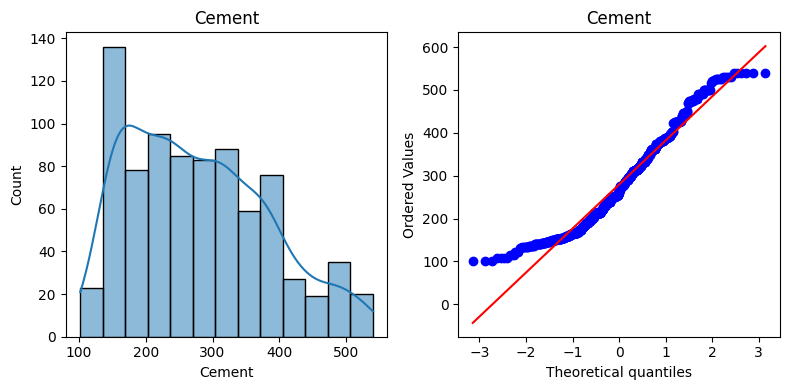

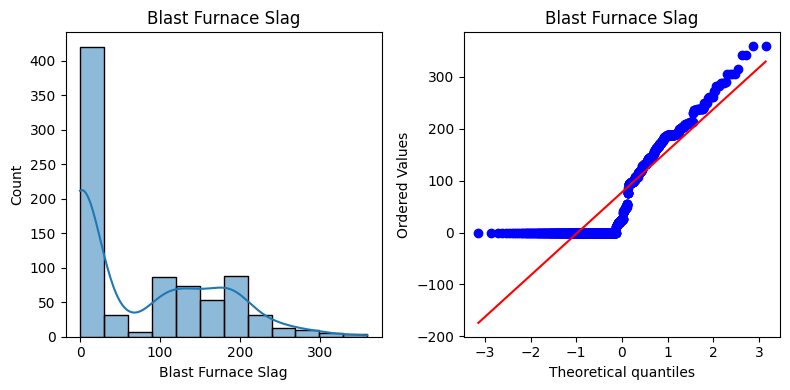

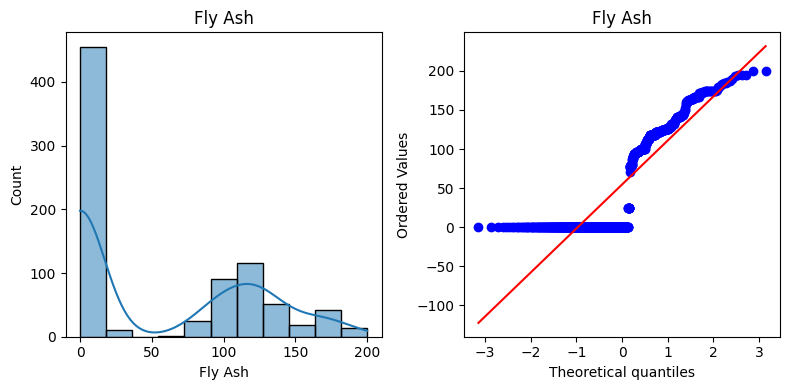

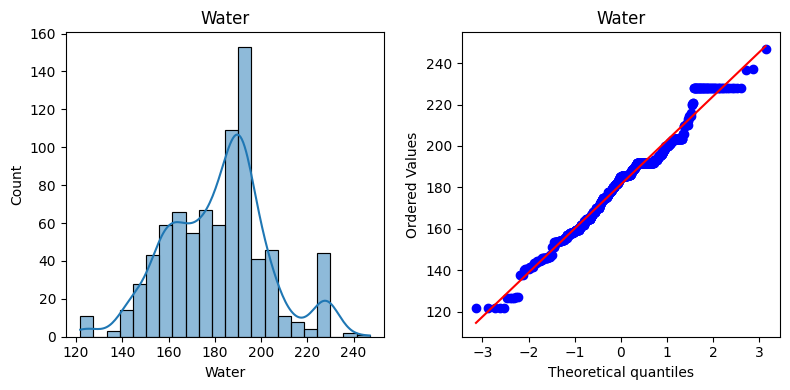

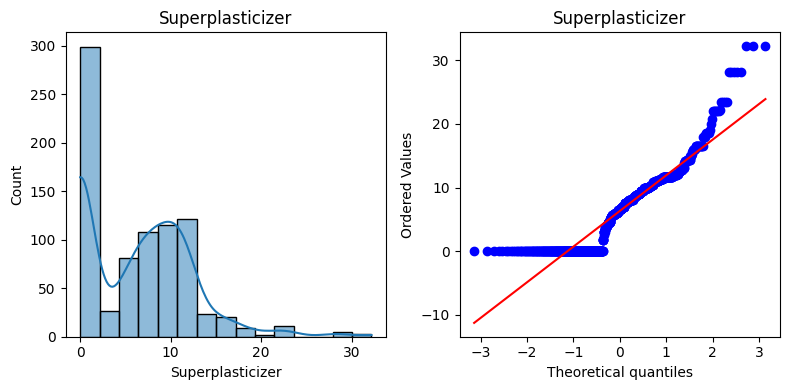

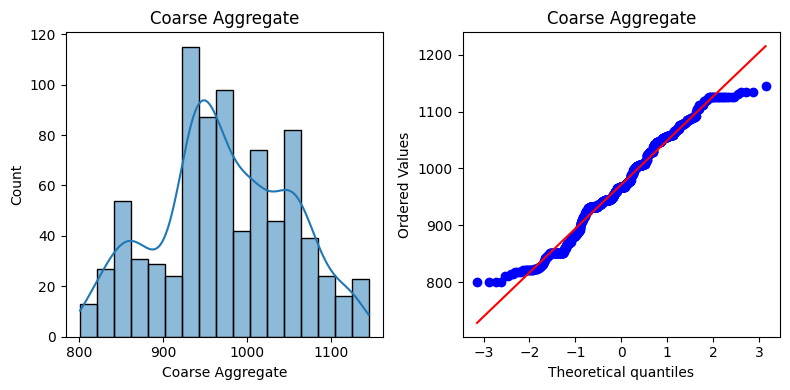

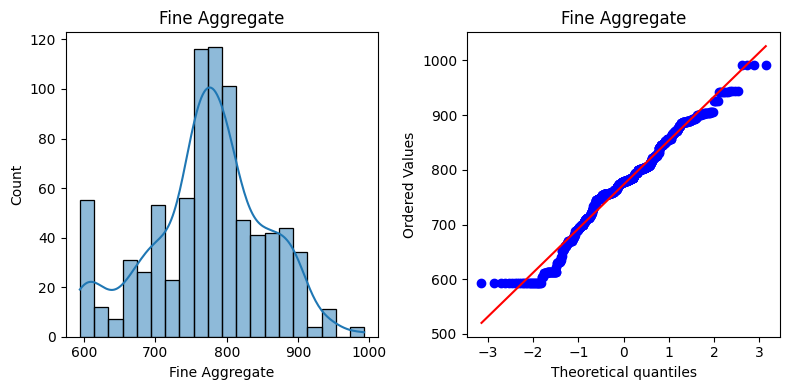

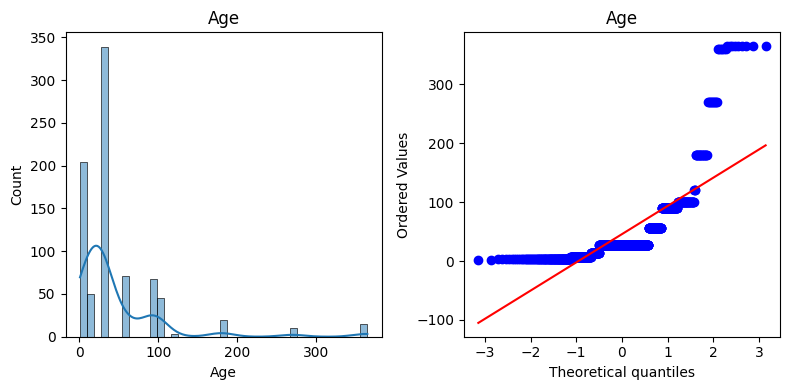

In [19]:
x = df.drop(columns=['Strength'])
y = df['Strength']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print("ACCURACY : ", np.round(r2_score(y_test, y_pred),2)*100, "\n")

# cross validation
print("CROSS VALIDATION : ", np.round(cross_val_score(lr, x, y, cv=5, scoring='r2'),2)*100, "\n")        # as we can see from the cross validataion the acutual accuracy is very low
print("CROSS VALIDATION (MEAN) : ", np.mean(np.round(cross_val_score(lr, x, y, cv=5, scoring='r2'),2)*100), "\n")        # as we can see from the cross validataion the acutual accuracy is very low
# cv=5 means 5-fold cross-validation
# Train the model on 4 parts
# Test it on the remaining 1 part
# Repeat this process 5 times, each time using a different part for testing


# plotting distplot without any transformations
for i in x_train.columns:
    plt.figure(figsize=(8,4))

    plt.subplot(121)
    sns.histplot(x_train[i], kde=True)
    plt.title(i)

    plt.subplot(122)
    stats.probplot(x_train[i], dist='norm', plot=plt)
    plt.title(i)

    plt.tight_layout()
    plt.show()




### Applying box-cox

In [6]:
pt = PowerTransformer(method='box-cox')

x_train_transformed = pt.fit_transform(x_train+0.000001)        # here we have added this number to avoid the 0 values
x_test_transformed = pt.fit_transform(x_test+0.000001)

pd.DataFrame({'cols':x_train.columns, 'box_cox_lambdas':pt.lambdas_})       # there is no need to scale the data, when you use box-cox it automatically applies StandardSclaer and then applies normalization on it
# pt.lambdas_ -- will give the lamlbda value of each column
# what these numbers do is, it will apply the given lambda values as power on the each value of their respective columns


,cols,box_cox_lambdas
0,Cement,0.231588
1,Blast Furnace Slag,0.001275
2,Fly Ash,-0.025570
3,Water,0.419493
4,Superplasticizer,0.064488
5,Coarse Aggregate,1.176778
6,Fine Aggregate,2.005206
7,Age,-0.004791


In [7]:
# applying linear regression on transformed data

lr = LinearRegression()
lr.fit(x_train_transformed, y_train)

y_pred2 = lr.predict(x_test_transformed)
print("ACCURACY : ", r2_score(y_test, y_pred2))     # as you can see the accuracy has increased tp 81 % on the transformed data

# using cross_val score
x_transformed = pt.fit_transform(x + 0.000001)
print(cross_val_score(lr, x_transformed, y, cv=5, scoring='r2'))        # this will train the data 5 times with different values every time, and will print all the 5 values that it got as accuaracy
print(np.mean(cross_val_score(lr, x_transformed, y, cv=5, scoring='r2')))   # it will print the mean of all the 5 values as one single accuracy (like avg of all the accuracy)


ACCURACY :  0.8113541220685642
[0.73350242 0.67425668 0.75822847 0.80876238 0.35672522]
0.6662950327179045


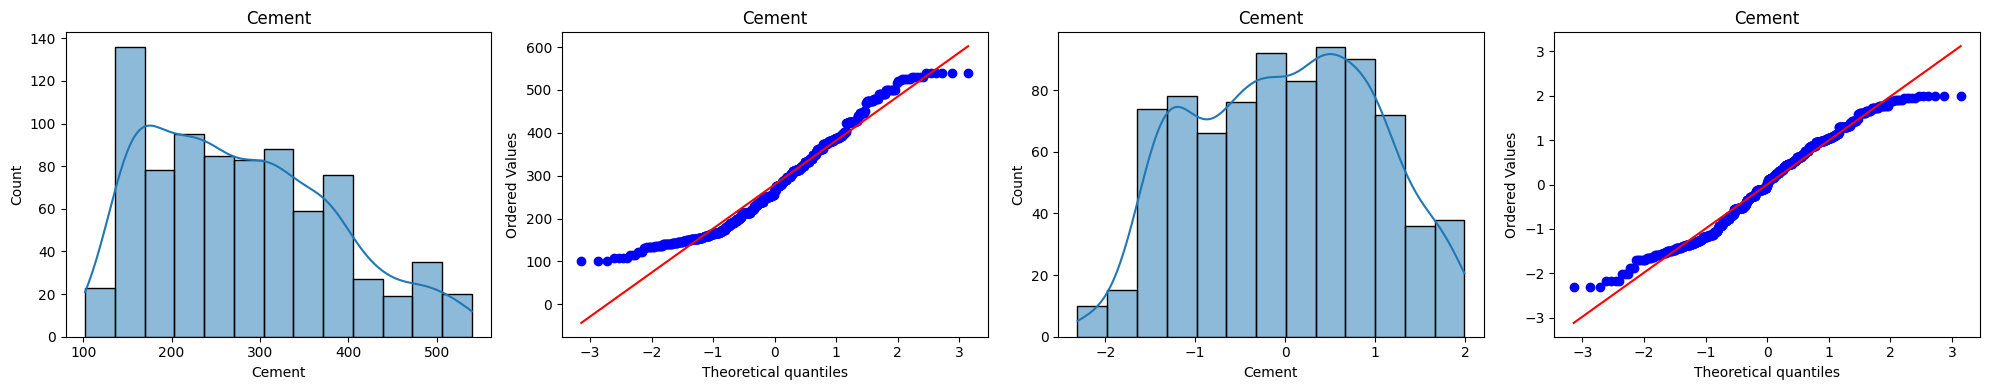

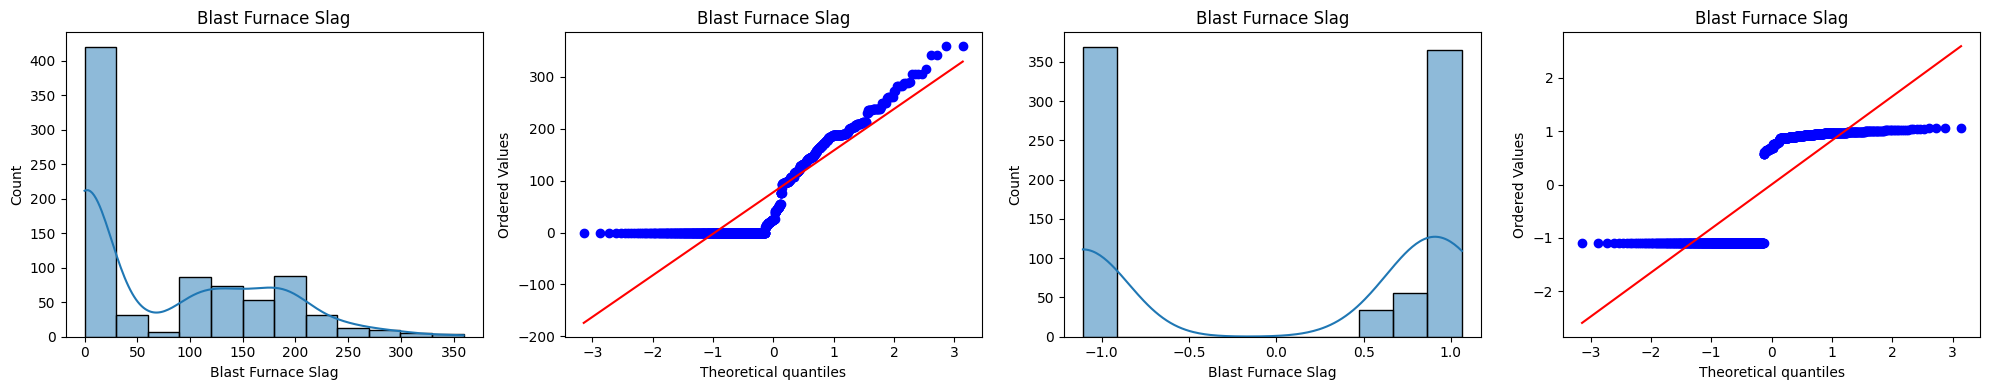

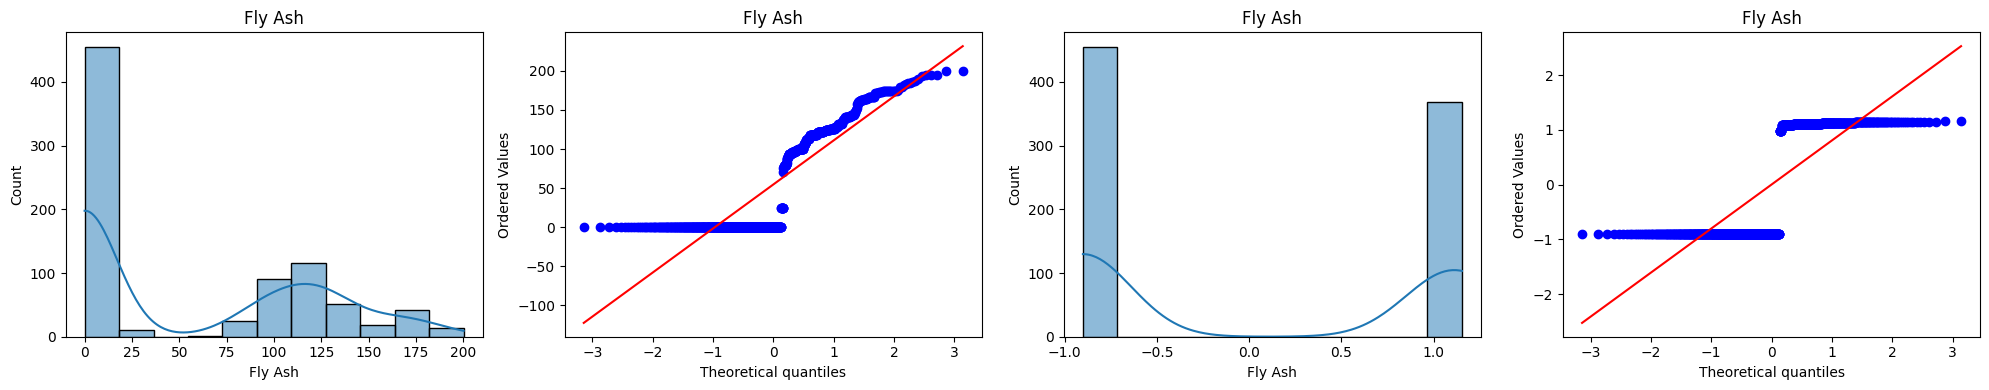

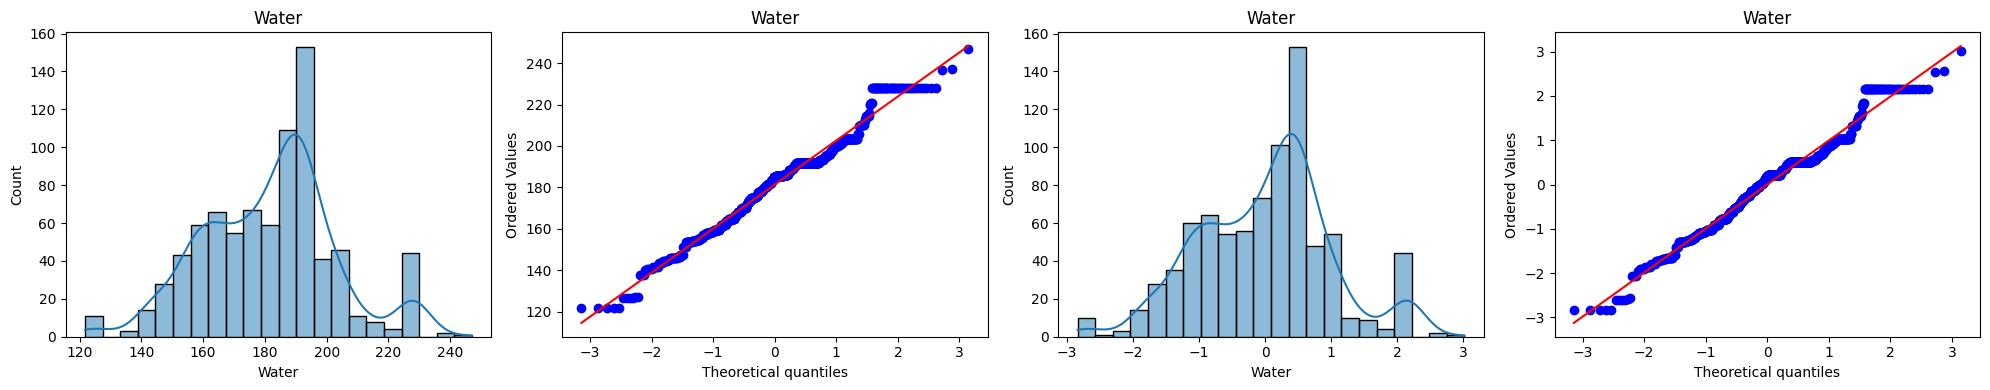

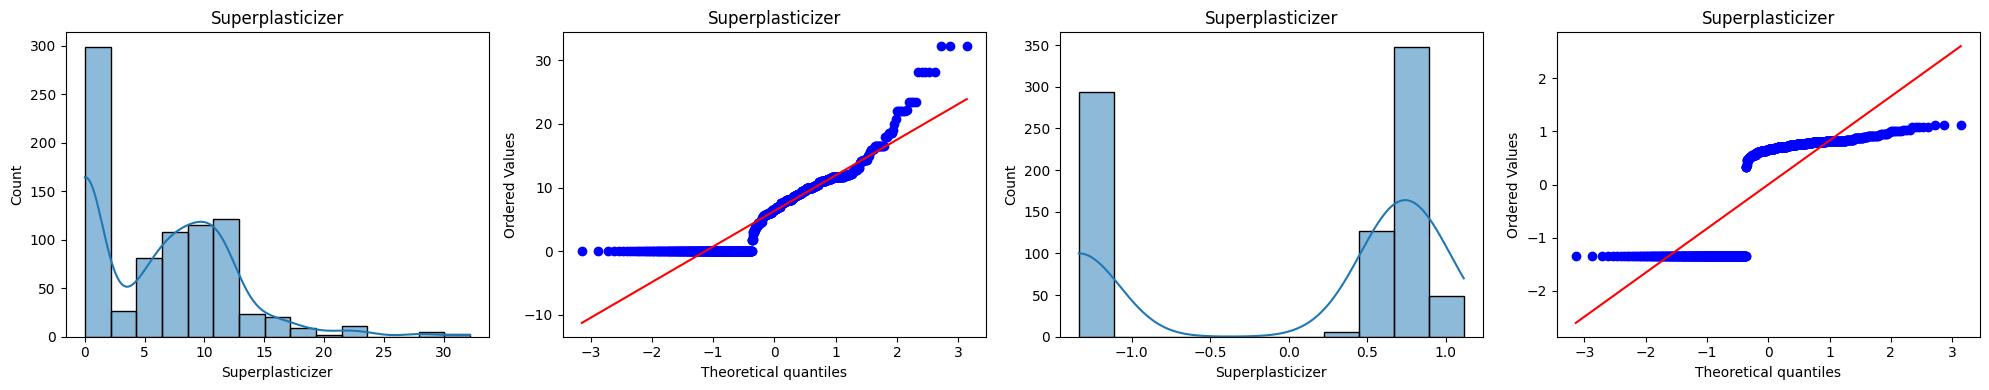

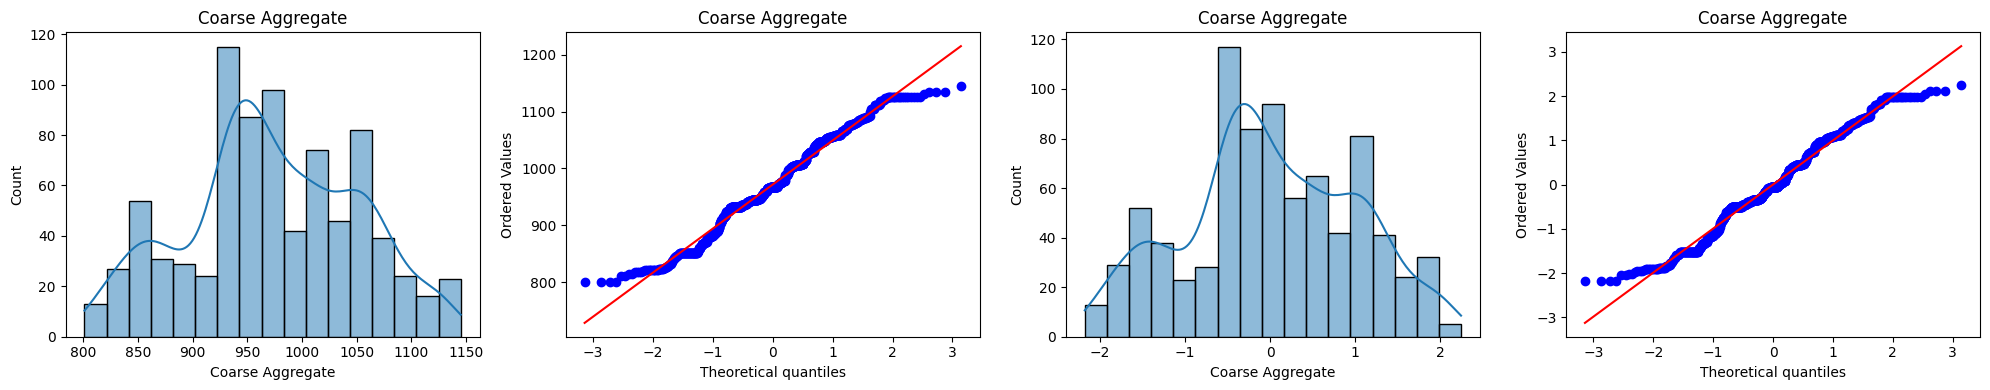

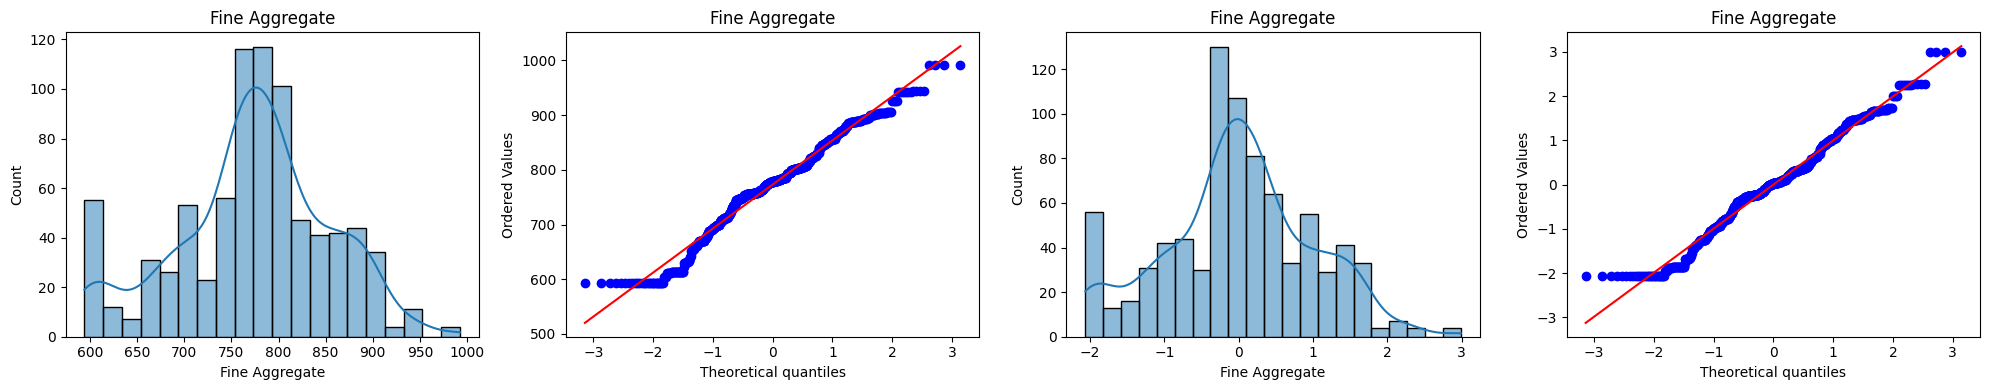

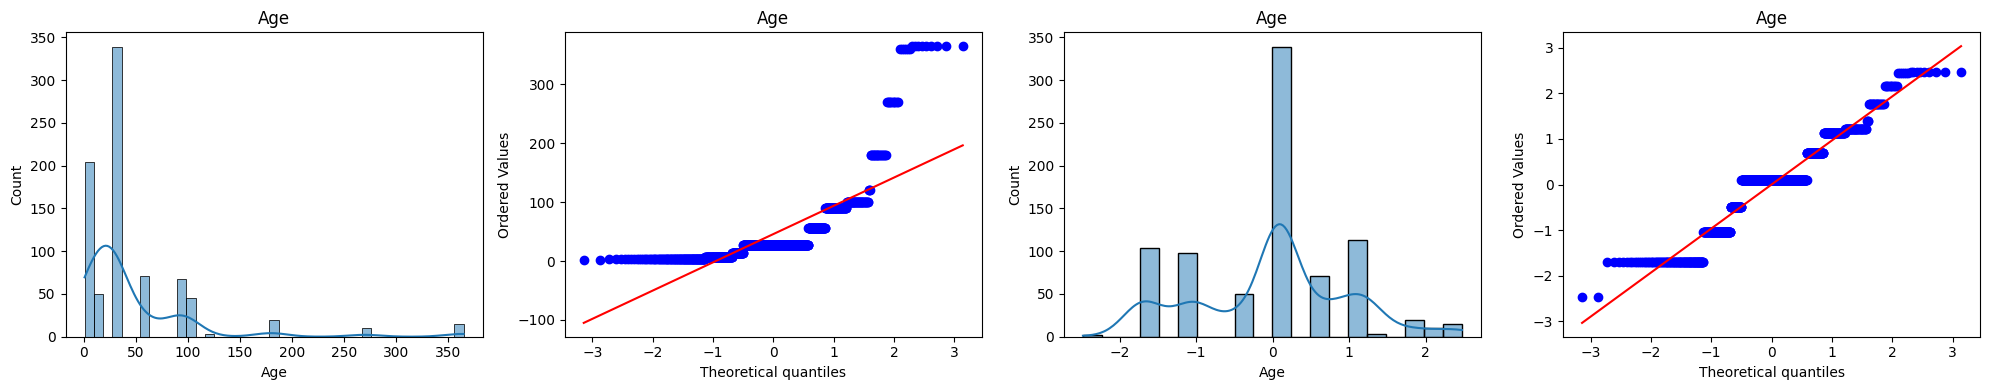

In [8]:
# before and after comoparison for box-cox plot
x_train_transformed = pd.DataFrame(x_train_transformed, columns=x_train.columns)

for i in x_train_transformed.columns:
    plt.figure(figsize=(20,4))

    plt.subplot(141)
    sns.histplot(x_train[i], kde=True)
    plt.title(i)

    plt.subplot(142)
    stats.probplot(x_train[i], dist='norm', plot=plt)
    plt.title(i)

    plt.subplot(143)
    sns.histplot(x_train_transformed[i], kde=True)
    plt.title(i)

    plt.subplot(144)
    stats.probplot(x_train_transformed[i], dist='norm', plot=plt)
    plt.title(i)

    plt.tight_layout()
    plt.show()

# the diagrams that you see below are the transformed data graphs
# this represents how the box-cox has normalized the data of every feature

### Applying yeo-johnson

In [9]:
pt1 = PowerTransformer(method='yeo-johnson')        # if you remove "method='yeo-johnson'" it will still work, coz by default the PowerTransformer is set to 'yeo-johnson'
x_train_transformed2 = pt1.fit_transform(x_train)
x_test_transformed2 = pt1.fit_transform(x_test)

lr = LinearRegression()
lr.fit(x_train_transformed2, y_train)
y_pred3 = lr.predict(x_test_transformed2)
print("ACCURACY : ", r2_score(y_test, y_pred3))         # as you can see the improvement in score is quite high ie 82

x_transformed2 = pt1.fit_transform(x)
print("CROSS VAL SCORE :", cross_val_score(lr, x_transformed2, y, scoring='r2', cv=5))
print("CROSS VAL SCORE (MEAN) :", np.mean(cross_val_score(lr, x_transformed2, y, scoring='r2', cv=5)))

pd.DataFrame({'cols': x_train.columns, 'yeo_jognson_lambdas': pt1.lambdas_})



ACCURACY :  0.821933077949349
CROSS VAL SCORE : [0.73026967 0.69469076 0.76110355 0.82725833 0.40399026]
CROSS VAL SCORE (MEAN) : 0.6834625126992434


,cols,yeo_jognson_lambdas
0,Cement,0.169544
1,Blast Furnace Slag,0.016633
2,Fly Ash,-0.136480
3,Water,0.808438
4,Superplasticizer,0.264160
5,Coarse Aggregate,1.129395
6,Fine Aggregate,1.830764
7,Age,0.001771


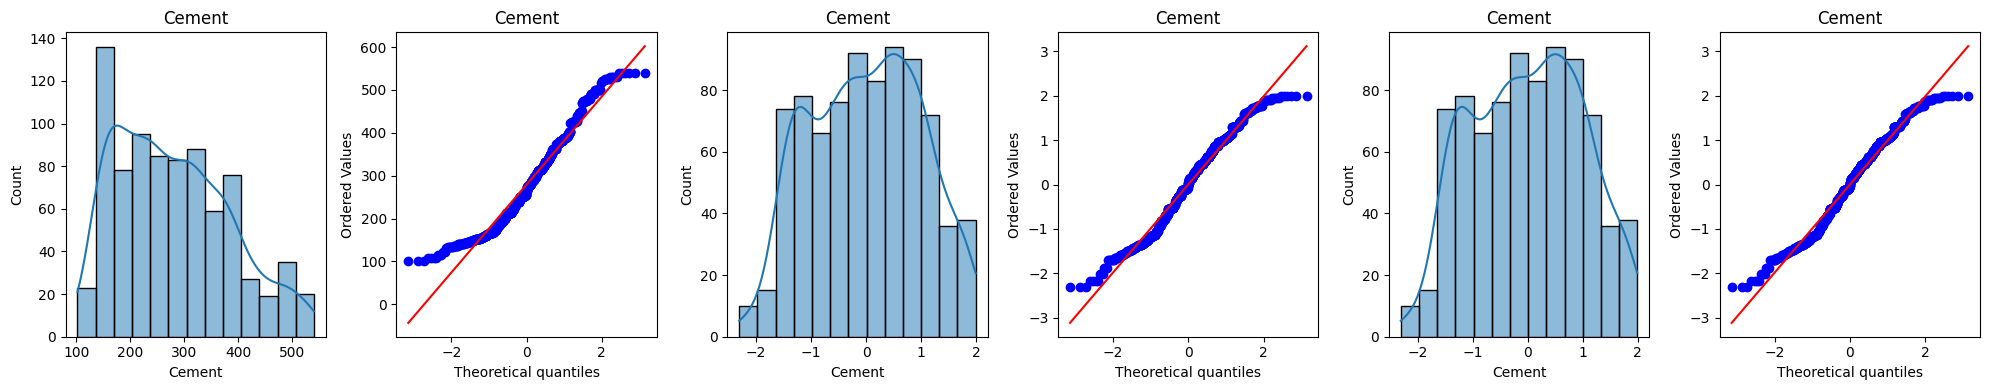

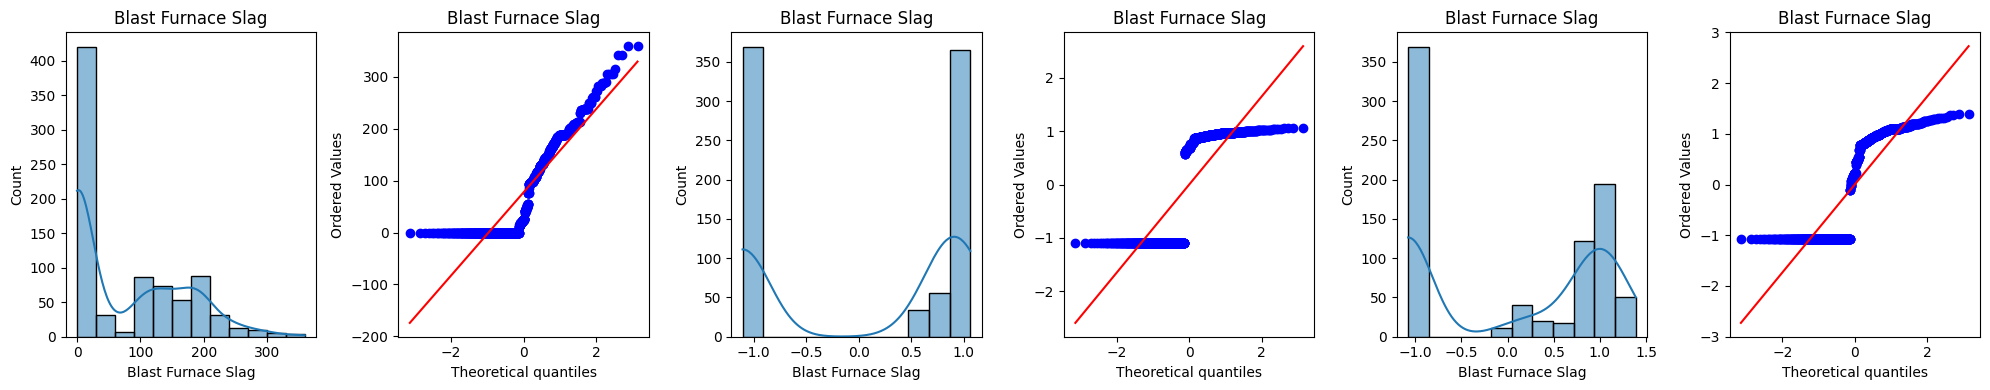

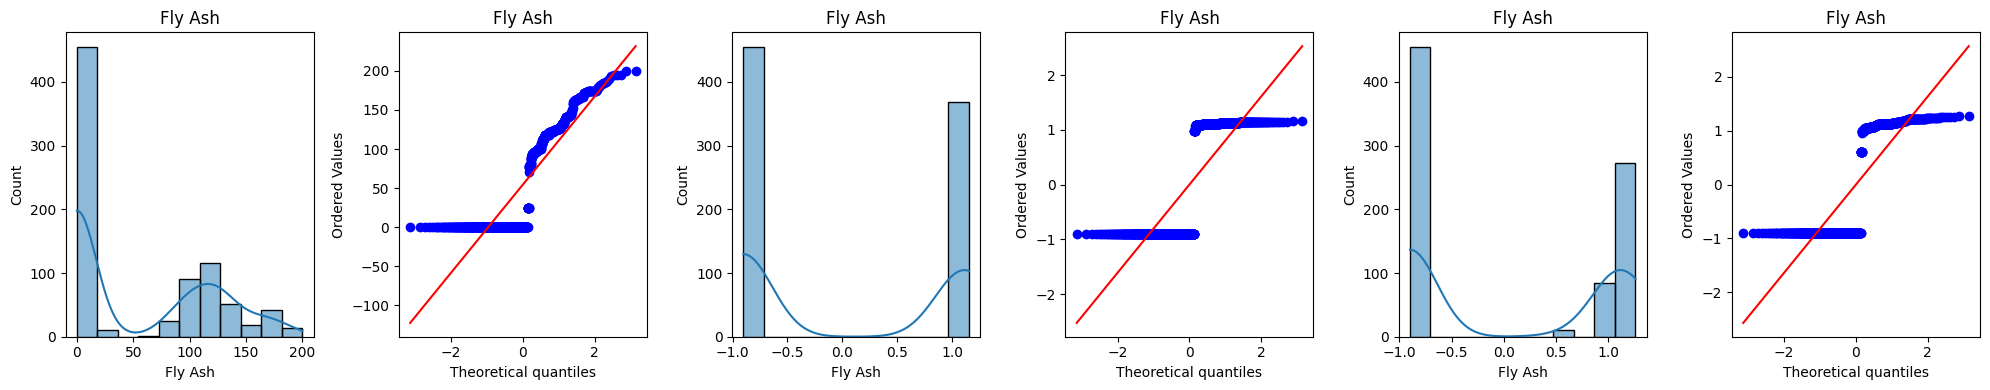

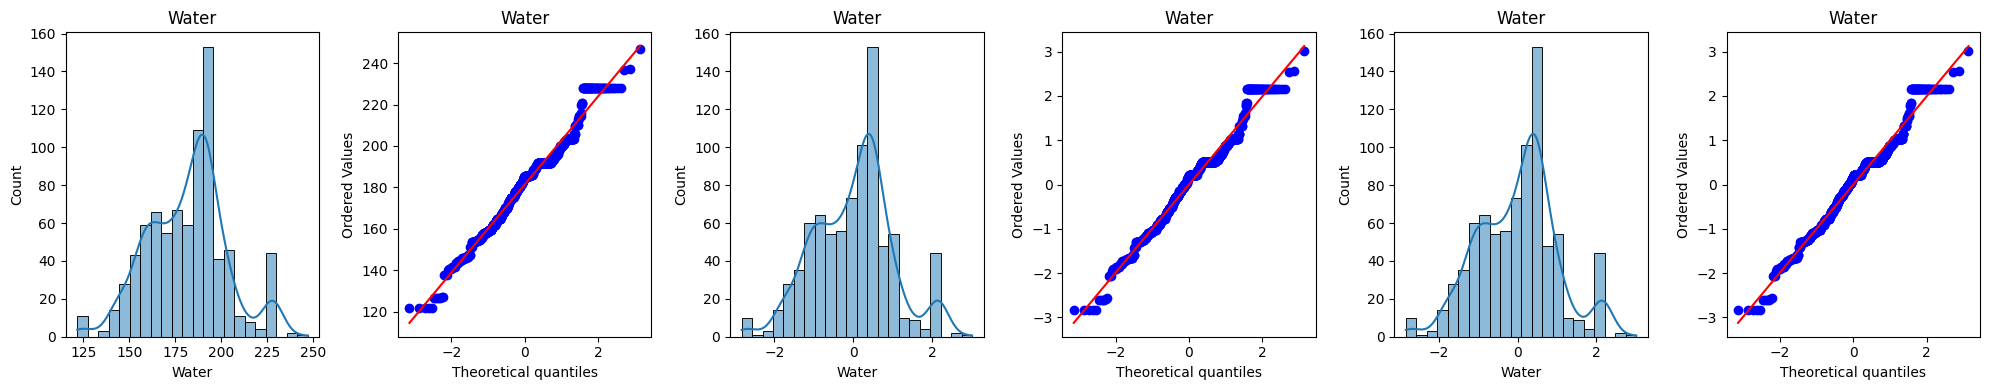

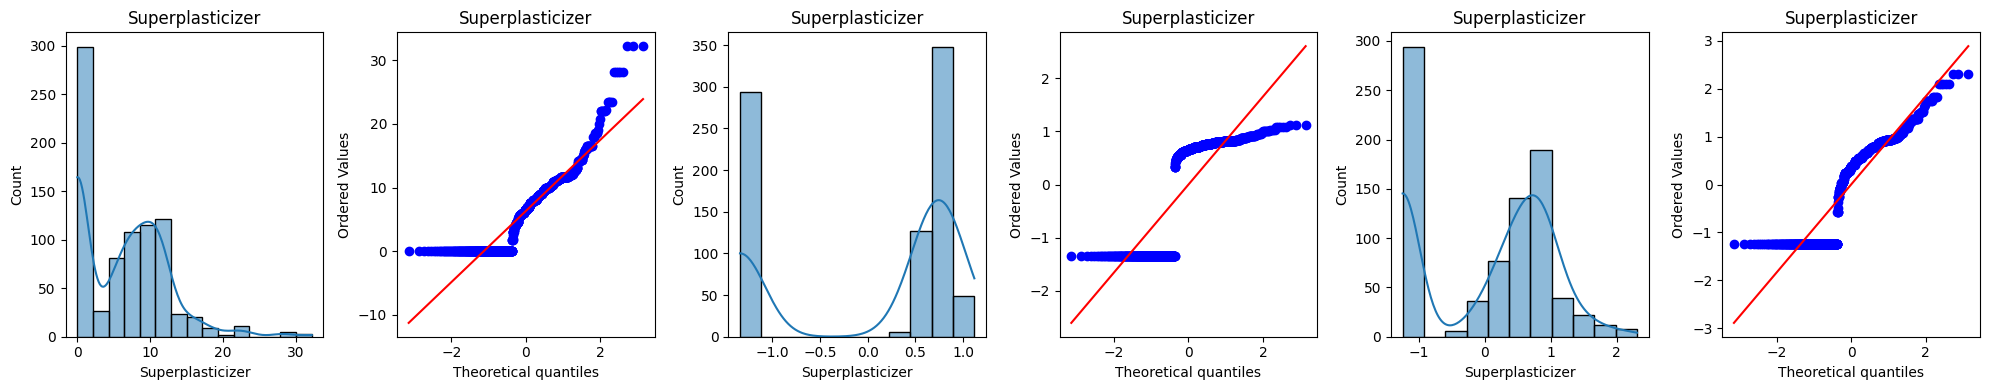

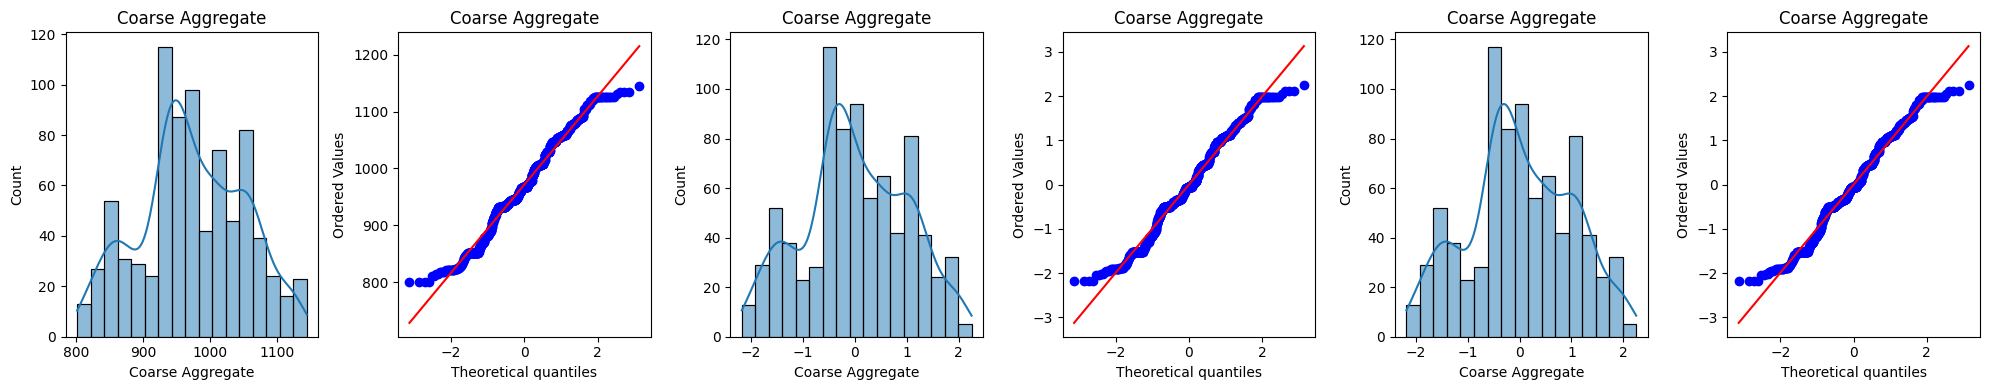

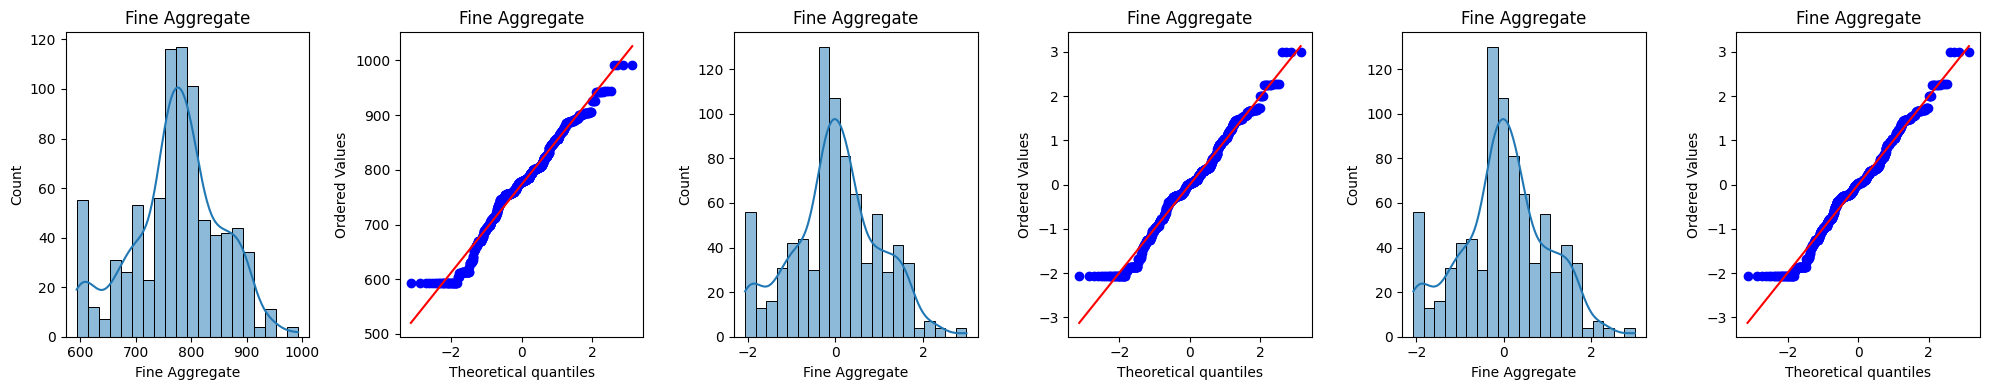

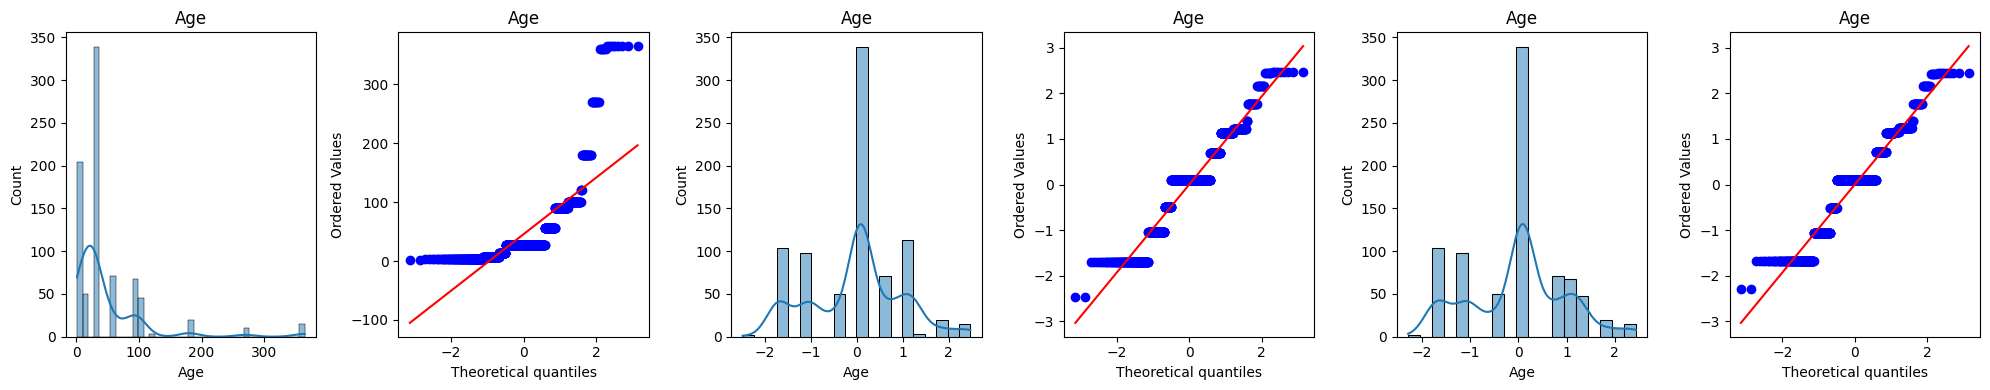

In [10]:
# before and after comparison

x_train_transformed2 = pd.DataFrame(x_train_transformed2, columns=x_train.columns)      # as x_train_transformed2 was in array format

for i in x_train_transformed2.columns:
    plt.figure(figsize=(20,4))

    # normal data
    plt.subplot(161)
    sns.histplot(x_train[i], kde=True)
    plt.title(i)

    plt.subplot(162)
    stats.probplot(x_train[i], dist='norm', plot=plt)
    plt.title(i)

    # box-cox data
    plt.subplot(163)
    sns.histplot(x_train_transformed[i], kde=True)
    plt.title(i)

    plt.subplot(164)
    stats.probplot(x_train_transformed[i], dist='norm', plot=plt)
    plt.title(i)

    # yeo-johnson data
    plt.subplot(165)
    sns.histplot(x_train_transformed2[i], kde=True)
    plt.title(i)

    plt.subplot(166)
    stats.probplot(x_train_transformed2[i], dist='norm', plot=plt)
    plt.title(i)

    plt.tight_layout()
    plt.show()

In [11]:
# plotting the above diagram using a function

def plots(df, box_cox=None, yeo_johnson=None):      # here i have put 'None' to make the box_cox and the yeo_johnson optional parameters
# if i put only one parameter then will only run the code for df
# if i put two or three parameter for box_cox and yeo_johnson then the existing values in the passed parameters will replace the 'None'

    if box_cox is not None:
        boxcox_df = pd.DataFrame(box_cox, columns=df.columns)
    
    if yeo_johnson is not None:
        yeojohnson_df = pd.DataFrame(yeo_johnson, columns=df.columns)
    
    # you can write "if box_cox is True", coz data frames are never True or False
    # 'is not None' checks whether a variable has a real value instead of being None
    # 'None' in Python means no value, nothing assigned, or absent data
    # 'is not None' ensures that the variable actually contains something (e.g., a DataFrame, list, number, etc.)


    for i in df.columns:
        plt.figure(figsize=(20, 4))

        # original plot
        plt.subplot(161)
        sns.histplot(df[i], kde=True)
        plt.title(i)

        plt.subplot(162)
        stats.probplot(df[i], dist='norm', plot=plt)
        plt.title(i)

        # Box–Cox plots (only if provided)
        if box_cox is not None:
            plt.subplot(163)
            sns.histplot(boxcox_df[i], kde=True)
            plt.title(i)

            plt.subplot(164)
            stats.probplot(boxcox_df[i], dist='norm', plot=plt)
            plt.title(i)

        # Yeo–Johnson plots (only if provided)
        if yeo_johnson is not None:
            plt.subplot(165)
            sns.histplot(yeojohnson_df[i], kde=True)
            plt.title(i)

            plt.subplot(166)
            stats.probplot(yeojohnson_df[i], dist='norm', plot=plt)
            plt.title(i)


        plt.tight_layout()
        plt.show()


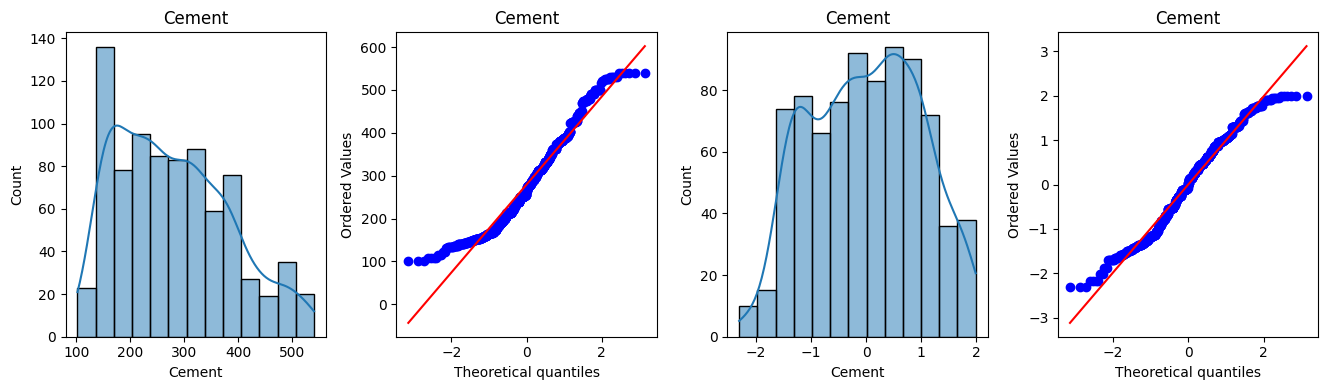

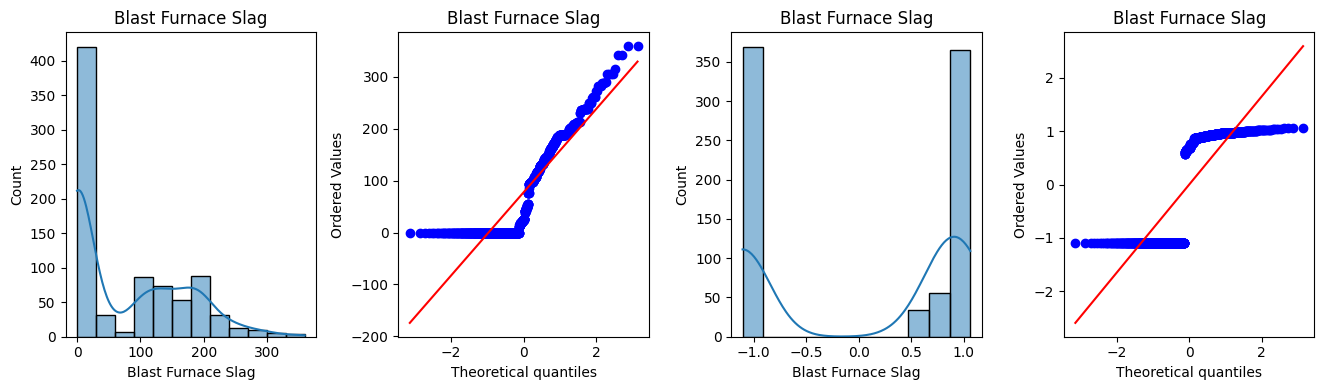

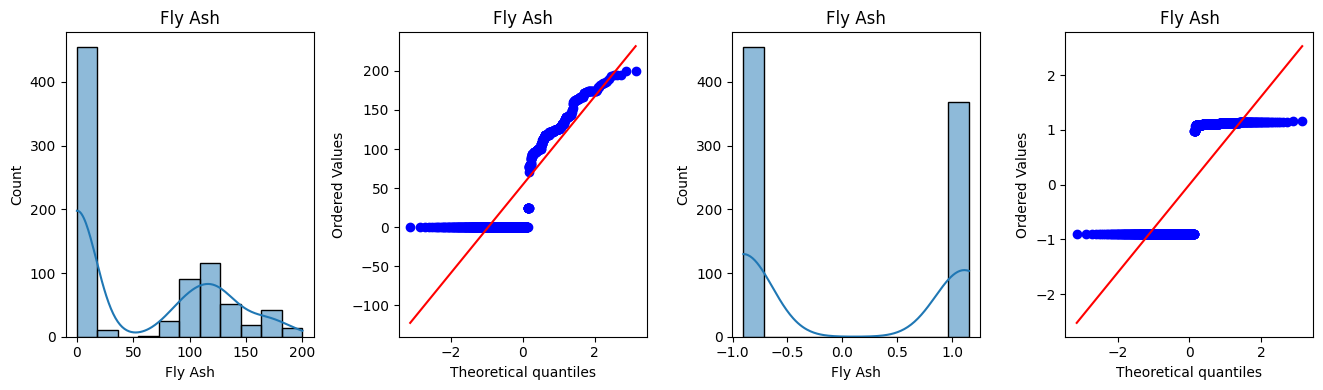

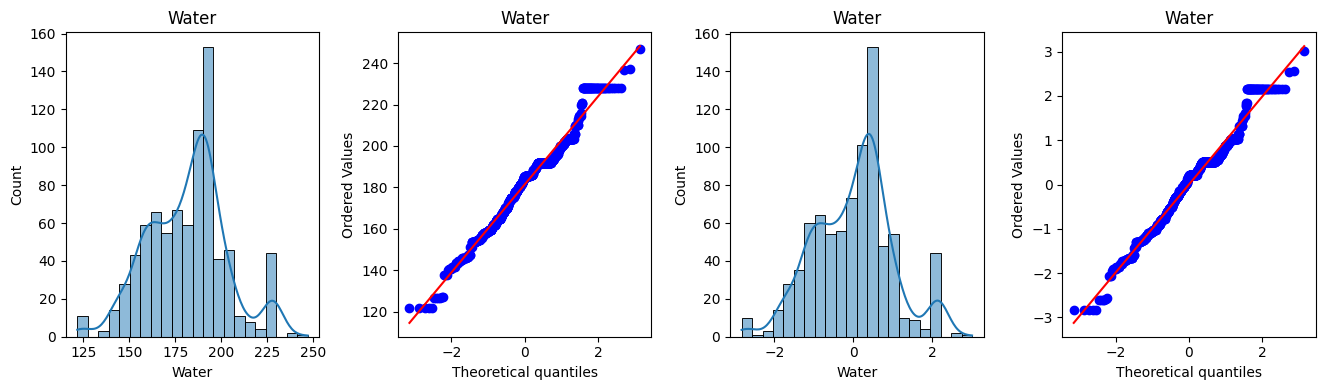

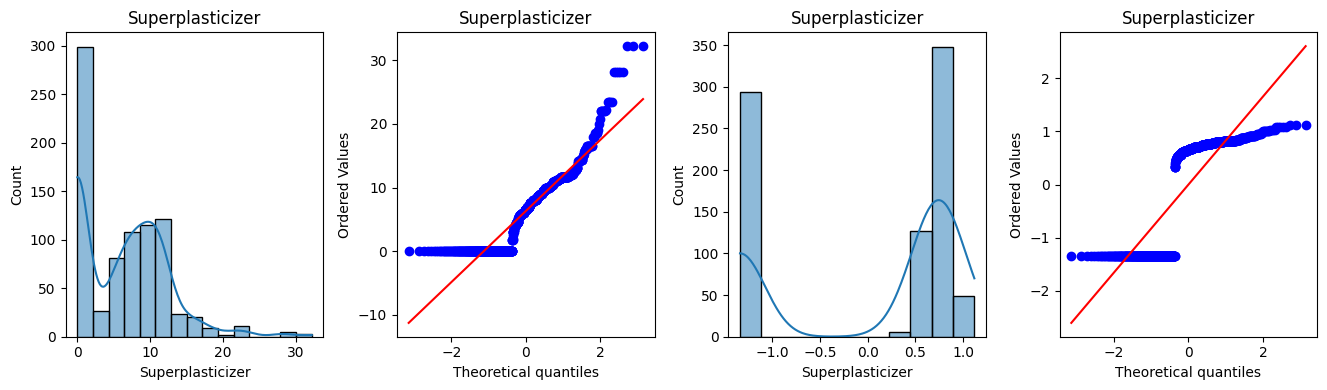

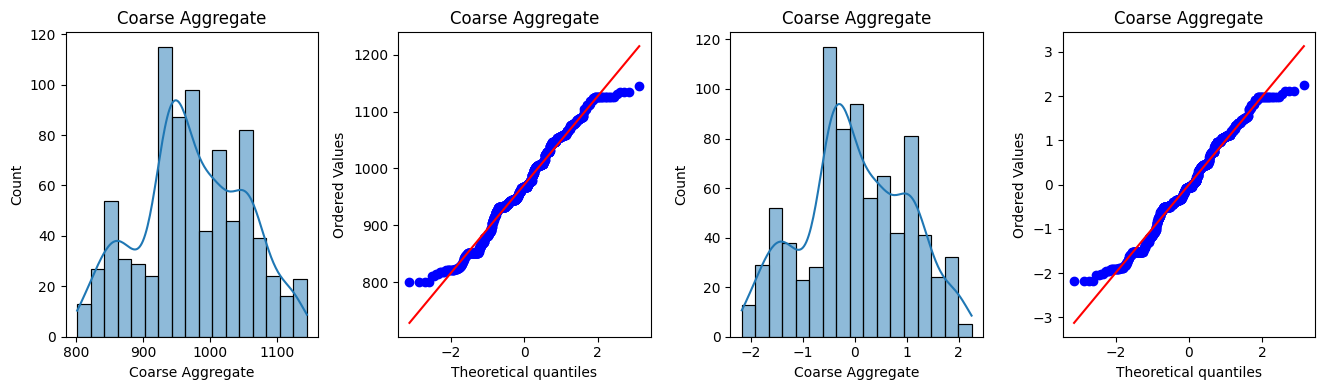

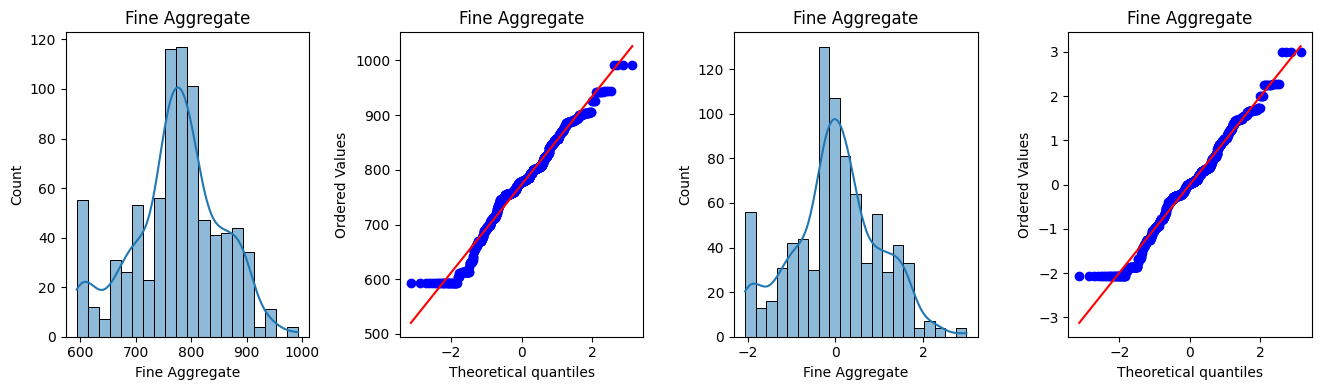

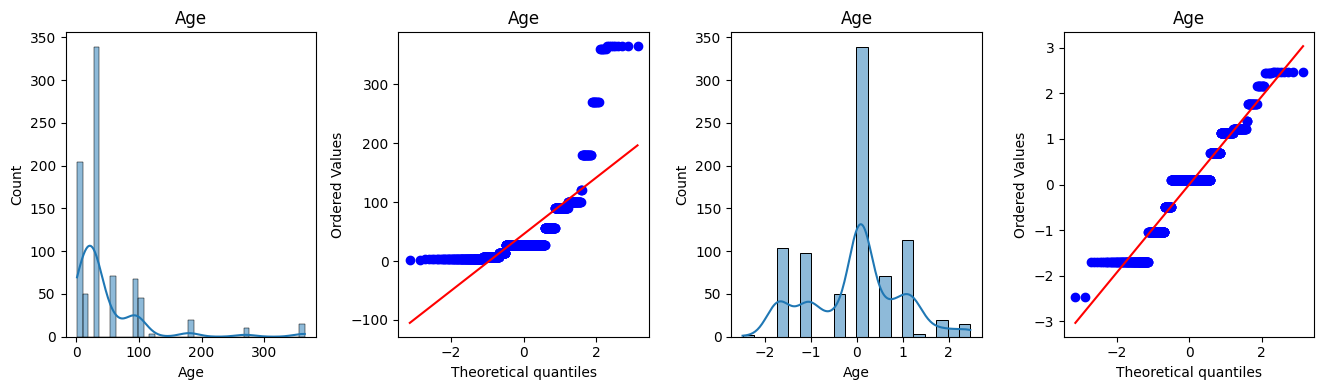

In [12]:
# calling the above function to print the plot
plots(x_train, x_train_transformed)      # you can pass two or more parameters here




### Making a side by side lambdas of both box-cox and yeo-johnson

In [13]:



"""
The λ (lambda) values from Box-Cox and Yeo-Johnson indicate how much each feature needed 
to be transformed to approximate normality. A lower lambda doesn't mean “worse”; it means 
less power transformation was required to normalize that feature.

When some λ values drop (like for Cement or Age), it means the transformation found a 
smaller optimal exponent for those variables based on their distribution. This can happen if:
- The variable was already close to normal (less adjustment needed).
- The variable's skewness direction changed (especially in Yeo-Johnson, which handles negative values).
- Outliers or scaling influenced the fitted λ.

In short, a decrease in lambda values doesn't indicate degradation; it reflects different 
optimal parameters to achieve normality. To verify improvement, plot histograms or QQ plots 
of each feature before and after transformation rather than comparing λ magnitudes.
"""

pd.DataFrame({
    'cols':x_train.columns,
    'box_cox_lambdas': pt.lambdas_,
    'yeo_johnson_lambdas': pt1.lambdas_
})


# as we can see there is huge improvement in Fly Ash, Superplasticizer
# while there is fall in Cement, Blast Furnace Slag, Age

,cols,box_cox_lambdas,yeo_johnson_lambdas
0,Cement,0.172271,0.169544
1,Blast Furnace Slag,0.025273,0.016633
2,Fly Ash,-0.032412,-0.136480
3,Water,0.809568,0.808438
4,Superplasticizer,0.099711,0.264160
5,Coarse Aggregate,1.129168,1.129395
6,Fine Aggregate,1.829625,1.830764
7,Age,0.048975,0.001771


In [14]:
""" 
Q/ suppose i have two datasets, one with having both highly left and right skewed data, and another with both modereate left and right skewed data. Now tell me what should i use here


The Problem with Mixed Skewness
You CANNOT use the same transform for both:

Log/Square Root → Only fixes RIGHT skew
Reciprocal → Fixes right skew but CREATES left skew
Exponential → Only fixes LEFT skew

You need column-specific transformations!


For Dataset 1: Highly Left AND Right Skewed

    ✅ Handles both left and right skew (extreme left and right skew)
    ✅ Handles negative values (Box-Cox can't)
    ✅ Handles zeros
    ✅ Column-specific transformation (different lambda per column)
    ✅ Automatically optimizes for normality

For Dataset 2: Moderate Left AND Right Skewed
Use QuantileTransformer (Uniform or Normal)

        EXAMPLE CODE
        -------------
        from sklearn.preprocessing import QuantileTransformer

        # For moderate skewness, rank-based transformation works great
        qt = QuantileTransformer(output_distribution='normal', random_state=42)
        transformed_data = qt.fit_transform(df)

        # OR for uniform distribution
        qt_uniform = QuantileTransformer(output_distribution='uniform', random_state=42)
        transformed_uniform = qt_uniform.fit_transform(df)

    ✅ Handles any distribution shape
    ✅ Forces data to exact normal or uniform distribution
    ✅ Works on each column independently
    ✅ Robust to outliers
    ⚠️ Loses some information (rank-based)



"""

" \nQ/ suppose i have two datasets, one with having both highly left and right skewed data, and another with both modereate left and right skewed data. Now tell me what should i use here\n\n\nThe Problem with Mixed Skewness\nYou CANNOT use the same transform for both:\n\nLog/Square Root → Only fixes RIGHT skew\nReciprocal → Fixes right skew but CREATES left skew\nExponential → Only fixes LEFT skew\n\nYou need column-specific transformations!\n\n\nFor Dataset 1: Highly Left AND Right Skewed\n\n    ✅ Handles both left and right skew (extreme left and right skew)\n    ✅ Handles negative values (Box-Cox can't)\n    ✅ Handles zeros\n    ✅ Column-specific transformation (different lambda per column)\n    ✅ Automatically optimizes for normality\n\nFor Dataset 2: Moderate Left AND Right Skewed\nUse QuantileTransformer (Uniform or Normal)\n\n        EXAMPLE CODE\n        -------------\n        from sklearn.preprocessing import QuantileTransformer\n\n        # For moderate skewness, rank-based t